COMP460 Homework 1: Karatsuba Multiplication 

As a starting point, I tested the pre-written code for simple recursive multiplication below. 

In [1]:
def add_strings(x: str, y: str) -> str:
    """
    Add two nonnegative integer strings by converting to int.
    This method can be rewritten as a sum/carry adder for a
    single digit addition, pulling characters from the
    input strings. For simplicity now, we just convert the
    whole string to integer, do the addition, and then
    convert the number back to string.
    """
    return str(int(x) + int(y))


def simple_recursive_multiplication(x: str, y: str) -> str:
    """
    Recursive multiplication for nonnegative integer strings.
    Assumptions:
      - len(x) == len(y)
      - len(x) is a power of two
      - x and y contain only digits
    Uses:
      xy = ac*10^n + (ad+bc)*10^(n/2) + bd
    """
    # Number of digits in x, y
    n = len(x)
    
    # Base case
    if n == 1:
        return str(int(x) * int(y))
    
    # Middle of x, y for splitting them in left/right halves
    m = n // 2
    
    # Divide x, y into left/right halves
    a = x[:m]
    b = x[m:]
    c = y[:m]
    d = y[m:]
    
    # Compute the partial solution
    ac = simple_recursive_multiplication(a, c)
    ad = simple_recursive_multiplication(a, d)
    bc = simple_recursive_multiplication(b, c)
    bd = simple_recursive_multiplication(b, d)
    
    # Conquer the partial solutions
    ad_plus_bc = add_strings(ad, bc)
    
    # Multiply by powers of 10 via appending zeros (string shift).
    term1 = ac + ("0" * n)
    term2 = ad_plus_bc + ("0" * m)
    
    # Final sum (Using int conversion for addition to keep things simple)
    return str(int(term1) + int(term2) + int(bd))

# --- quick sanity checks ---
if __name__ == "__main__":
    tests = [
        ("12", "34"),
        ("99", "99"),
        ("0123", "0456"),
        ("1234", "5678"),
        ("0000", "0000"),
        ("1111", "0001"),
        ("1234567890123456", "9876543210123456"),
        ("12345678901234561234567890123456", "12345678901234561234567890123456"),
        ("1234567890123456123456789012345612345678901234561234567890123456", "1234567890123456123456789012345612345678901234561234567890123456"),
    ]

    for x, y in tests:
        # Compare against Python int multiplication for correctness.
        got = simple_recursive_multiplication(x, y)
        want = str(int(x) * int(y))
        print(f"{x} * {y} = {got}  (ok={got == want})")


12 * 34 = 408  (ok=True)
99 * 99 = 9801  (ok=True)
0123 * 0456 = 56088  (ok=True)
1234 * 5678 = 7006652  (ok=True)
0000 * 0000 = 0  (ok=True)
1111 * 0001 = 1111  (ok=True)
1234567890123456 * 9876543210123456 = 12193263112635260231976841383936  (ok=True)
12345678901234561234567890123456 * 12345678901234561234567890123456 = 152415787532388203170249644871236061576303002601726870921383936  (ok=True)
1234567890123456123456789012345612345678901234561234567890123456 * 1234567890123456123456789012345612345678901234561234567890123456 = 1524157875323882031702496448712391098920536503657902759142813607364731048132908548544433921658436061576303002601726870921383936  (ok=True)


After testing the simple implementation, I adapted the code to implement Karatsuba and tested it with the same number pairings. 

In [2]:
import math

def add_strings(x: str, y: str) -> str:
    """
    Add two nonnegative integer strings by converting to int.
    This method can be rewritten as a sum/carry adder for a
    single digit addition, pulling characters from the
    input strings. For simplicity now, we just convert the
    whole string to integer, do the addition, and then
    convert the number back to string.
    """  
    return str(int(x) + int(y))

def karatsuba_multiplication(x: str, y: str) -> str:
    """
    Recursive multiplication for nonnegative integer strings.
    Assumptions:
      - len(x) == len(y)
      - len(x) is a power of two
      - x and y contain only digits
    Uses:
      xy = ac*10^n + (ad+bc)*10^(n/2) + bd
    """
    #CHECKING ASSUMPTIONS
        #at first I thought this wouldn't be an issue because all the of the input pairs are even lengths and powers of two
        #but I kept getting errors or wrong answers when I didn't control for assumptions, so I do a check below:
    
    #1) does len(x) == len(y)?
    #if not, we want to add extra zeroes at the beginning to make them equal lengths
    if len(x) != len(y): #if not equal: 
        if len(x) > len(y): #if x is longer than y
            y = ("0" * (len(x) - len(y))) + y #add zeroes to beginning of y
        else: 
            x = ("0" * (len(y) - len(x))) + x #else add zeroes to beginning of x
    
    #2) is len(x) a power of two? 
    #if not, we want to add leading zeroes so both numbers are powers of two
    if math.log2(len(x)).is_integer() == False: #if we take the log2 and the answer is not an integer, the length is not a power of two
        
        #make both x and y have a length that is the next power of 2
        desired_length = len(x)
        
        #increase the desired length until we reach a power of two
        while math.log2(desired_length).is_integer()== False:
            desired_length += 1
        
        #then we add zeroes to x and y to make sure they're equal to this length
        y = ("0" * (desired_length - len(y))) + y
        x = ("0" * (desired_length - len(x))) + x
    
    #I didn't check the digits assumption because all my input data is in digits and none of the calculations should create characters
    
    #Ok, now we actually start Karatsuba:
    
    # find the number of digits in x, y
    n = len(x)
    
    # Base case
    if n == 1: #if x is down to one digit now
        return str(int(x) * int(y)) #we turn x and y into integers and we multiply them directly
    
    #if x is still longer than one digit, we split it in halves of length m
    m = n // 2
    
    # Divide x, y into left/right halves to make a,b,c,d
    a = x[:m]
    b = x[m:]
    c = y[:m]
    d = y[m:]
    
    #multiply each of the parts together
    #for karatsuba: we don't need to calculate ALL of these, just ac, bd, and then we do karatsuba(a+b, c+d) - ac - bd
    ac = karatsuba_multiplication(a, c)
    bd = karatsuba_multiplication(b, d)
    
    #Add ab and cd together for when we calculate our middle term, eliminates a multiplication step from the simple algorithm
    a_plus_b = add_strings(a, b)
    c_plus_d = add_strings(c, d)
    
    #do karatsuba on a+b and c+d, then subtract ac and bd
    ad_plus_bc = str(int(karatsuba_multiplication(a_plus_b, c_plus_d)) - int(ac) - int(bd))
    
    # Multiply by powers of 10 via appending zeros (string shift).
    term1 = ac + ("0" * n)
    term2 = ad_plus_bc + ("0" * m)
    
    # Final sum (Using int conversion for addition to keep things simple)
    return str(int(term1) + int(term2) + int(bd))

# --- quick sanity checks ---
if __name__ == "__main__":
    tests = [
        ("12", "34"),
        ("99", "99"),
        ("0123", "0456"),
        ("1234", "5678"),
        ("0000", "0000"),
        ("1111", "0001"),
        ("1234567890123456", "9876543210123456"),
        ("12345678901234561234567890123456", "12345678901234561234567890123456"),
        ("1234567890123456123456789012345612345678901234561234567890123456", "1234567890123456123456789012345612345678901234561234567890123456"),
    ]

    for x, y in tests:
        # Compare against Python int multiplication for correctness.
        got = karatsuba_multiplication(x, y)
        want = str(int(x) * int(y))
        print(f"{x} * {y} = {got}  (ok={got == want})")


12 * 34 = 408  (ok=True)
99 * 99 = 9801  (ok=True)
0123 * 0456 = 56088  (ok=True)
1234 * 5678 = 7006652  (ok=True)
0000 * 0000 = 0  (ok=True)
1111 * 0001 = 1111  (ok=True)
1234567890123456 * 9876543210123456 = 12193263112635260231976841383936  (ok=True)
12345678901234561234567890123456 * 12345678901234561234567890123456 = 152415787532388203170249644871236061576303002601726870921383936  (ok=True)
1234567890123456123456789012345612345678901234561234567890123456 * 1234567890123456123456789012345612345678901234561234567890123456 = 1524157875323882031702496448712391098920536503657902759142813607364731048132908548544433921658436061576303002601726870921383936  (ok=True)


[4, 8, 16, 32, 64, 128, 256, 512, 1024, 2048]
[2.12500017369166e-05, 3.3666001399978995e-05, 7.44159915484488e-05, 0.00012333400081843138, 0.00018500001169741154, 0.00038158400275278836, 0.0006647499976679683, 0.0013057089963695034, 0.0025516669993521646, 0.005210208997596055]
[1.1042007827199996e-05, 3.458300489000976e-05, 0.00013791599485557526, 0.0005217090074438602, 0.0021166670048842207, 0.008080125000560656, 0.03340804199979175, 0.1341614999982994, 0.53451829100959, 2.1366088330105413]


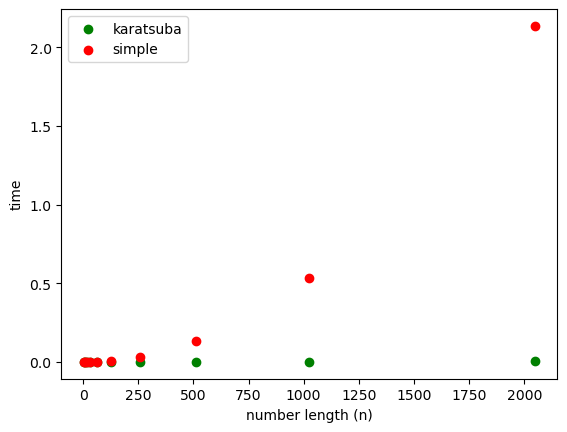

In [3]:
#ok, now we are measuring time complexity for both algorithms
import time #for measuring time complexity
import random #for generating random numbers
import matplotlib.pyplot as plt #for plotting the complexity results at the end

if __name__ == "__main__":
    
    n = 4 #start with length 4
    
    n_values = list() #initialize list to keep all lengths tested
    kara_time = list() # list of karatsuba processing times
    simp_time = list() # list of simple recursive processing times
    
    while n <= 2048: #until we get to length = 2048:
        
        #generate two random numbers between 0 and max number with n digits
        random_num_1 = str(random.randrange(0, 10*n))
        random_num_2 = str(random.randrange(0, 10*n))
        
        #add zeroes to beginning as needed to make sure lengths of both numbers are equal to n
        random_num_1 = ("0" * (n - len(random_num_1))) + random_num_1
        random_num_2 = ("0" * (n - len(random_num_2))) + random_num_2
        
        #do karatsuba with time measurement
        start_time_kara = time.perf_counter()
        kara_results = karatsuba_multiplication(random_num_1, random_num_2)
        end_time_kara = time.perf_counter()
        
        #do simple recursive with time measurement
        start_time_simp= time.perf_counter()
        simp_results = simple_recursive_multiplication(random_num_1, random_num_2)
        end_time_simp = time.perf_counter()
        
        #add results to lists 
        n_values.append(n)
        kara_time.append(end_time_kara - start_time_kara)
        simp_time.append(end_time_simp - start_time_simp)
    
        #increment n by a power of 2
        n = n * 2
    
#sanity check the values of n tested and the processing time for each method
print(n_values)
print(kara_time)
print(simp_time)

#I'm going to plot it too so it's easier for me to see the difference
plt.scatter(n_values, kara_time, color="green", label = "karatsuba") #karatsuba in green 
plt.scatter(n_values, simp_time, color= "red", label = "simple") #simple in red

plt.xlabel("number length (n)") #give x-axis a label
plt.ylabel("time") #give y-axis a label
plt.legend() #show the legend too so I know which color is which

plt.show() #display plot

Comments on simple recursive vs karatsuba complexity: The simple recursion shows a quadratic complexity, with time increasing noticeably as n increases. In contrast, the karatsuba calculations appear to take relatively the same amount of time even as n increases. This emphasizes that eliminating unnecessary multiplication steps can decrease the processing time. 

Comments on assumptions: In my karatsuba function, I had to check assumptions and add extra zeroes at the beginning of each number anyways in order to get the code to run and multiply correctly. Theoretically, this should adjust any numbers used as input that do not meet the original assumptions In this case, the code would add zeroes at the beginning of each number to make it a power of two before doing any calculations.